In [18]:
import numpy as np

import sys
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution1D, Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from keras.layers.advanced_activations import LeakyReLU, PReLU
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras import optimizers
import matplotlib.pyplot as plt
################################################
import tensorflow as tf
from tensorflow.python.client import device_lib
#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.4)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
print(device_lib.list_local_devices())
#sess = tf.Session(config=config)
#################################################

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12515836753740947676
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 3051294720
locality {
  bus_id: 1
}
incarnation: 5411858465993061193
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0"
]


In [19]:
def load_data():
    train = pd.read_csv("data/m2train.csv")
    test = pd.read_csv("data/m2test.csv")
    x_train = train.drop(["class"], axis=1)
    y_tmp1 = train["class"]
    x_test = test.drop(["class"], axis=1)
    y_tmp2 = test["class"]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    y_test = []
    y_train = []
    '''for i in range(len(y_tmp1)):
        if y_tmp1[i] == 6:
            y_train.append([0,1,0,0,0])
        if y_tmp1[i] == 5 :
            y_train.append([1,0,0,0,0])
        
        if y_tmp1[i] == 4:
            y_train.append([0,0,1,0,0])
            
        if y_tmp1[i] == 3:
            y_train.append([1,0,0,0,0])
        if y_tmp1[i] == 2:
            y_train.append([0,0,0,0,1])
        if y_tmp1[i] == 1:
            y_train.append([0,0,0,0,1])
        if y_tmp1[i] == 0:
            y_train.append([0,0,0,1,0])
    for i in range(len(y_tmp2)):
        if y_tmp2[i] == 6:
            y_test.append([0,1,0,0,0])
        if y_tmp2[i] == 5:
            y_test.append([1,0,0,0,0])
        
        if y_tmp2[i] == 4:
            y_test.append([0,0,1,0,0])
        if y_tmp2[i] == 3:
            y_test.append([1,0,0,0,0])
        if y_tmp2[i] == 2:
            y_test.append([0,0,0,0,1])
        if y_tmp2[i] == 1:
            y_test.append([0,0,0,0,1])
        if y_tmp2[i] == 0:
            y_test.append([0,0,0,1,0])'''
            
            
    for i in range(len(y_tmp1)):
        if y_tmp1[i] == 6:
            y_train.append([0,1,0,0,0])
        if y_tmp1[i] == 5 :
            y_train.append([1,0,0,0,0])
        
        if y_tmp1[i] == 4:
            y_train.append([0,0,1,0,0])
            
        if y_tmp1[i] == 3:
            y_train.append([1,0,0,0,0])
        if y_tmp1[i] == 2:
            y_train.append([0,0,0,0,1])
        if y_tmp1[i] == 1:
            y_train.append([1,0,0,0,0])
        if y_tmp1[i] == 0:
            y_train.append([0,0,0,1,0])
    for i in range(len(y_tmp2)):
        if y_tmp2[i] == 6:
            y_test.append([0,1,0,0,0])
        if y_tmp2[i] == 5:
            y_test.append([0,0,0,0,0])
        
        if y_tmp2[i] == 4:
            y_test.append([0,0,1,0,0])
        if y_tmp2[i] == 3:
            y_test.append([1,0,0,0,0])
        if y_tmp2[i] == 2:
            y_test.append([0,0,0,0,1])
        if y_tmp2[i] == 1:
            y_test.append([0,0,0,0,0])
        if y_tmp2[i] == 0:
            y_test.append([0,0,0,1,0])
    '''y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)
    x_train /= 255
    x_test /= 255'''
    #print("y_test:",y_test)
    return (np.array(x_train), np.array(y_train)), (np.array(x_test), np.array(y_test))

In [3]:
def sigmoid(z):
    out = 1 / (1.0 + np.exp(-z))
    return out

def nor(x_train, x_test):
    #mean = np.mean(x_train, axis=0)
    #std = np.std(x_train, axis=0)
    #x_train = (x_train - mean) / std
    #x_test = (x_test - mean) / std
    x_train = np.arctan(x_train)*2 / np.pi
    x_test = np.arctan(x_test)*2 / np.pi
    return x_train, x_test

In [4]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [5]:
def show_train_history_two(train_history, train_history2, train, validation):  
    plt.plot(train_history.history[train]+train_history2.history[train])  
    plt.plot(train_history.history[validation]+train_history2.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [22]:
def model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(input_dim=77,units=1024, activation='sigmoid'))
    #model.add(LeakyReLU(alpha=.001))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(units=1024, activation='sigmoid'))
    #model.add(LeakyReLU(alpha=.001))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    for i in range(2):
        model.add(Dense(units=2048, activation='sigmoid'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

    model.add(Dense(units=5, activation='softmax'))
    #Configuration
    #opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    opt = optimizers.SGD(lr=0.01)
    #model.compile(loss = "mean_squared_error", optimizer = opt, metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='kullback_leibler_divergence', optimizer='adam', metrics=['accuracy'])
    #Pick the best function
    
    #callbacks = []
    #callbacks.append(ModelCheckpoint('model-{epoch:05d}-{val_acc:.5f}-{val_loss:.5f}.h5', monitor='val_acc', save_best_only=True, mode = 'auto', period=1))
    model.summary()
    
    train_history = model.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=128, verbose=2)
    model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
    train_history2 = model.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=256, verbose=2)

    result = model.evaluate(x_train, y_train, batch_size=10000)
    print("train accuracy:", result[1])

    result = model.evaluate(x_test, y_test, batch_size=10000)
    print("test accuracy:", result[1])
    return train_history, train_history2 

    
    
(x_train, y_train), (x_test, y_test) = load_data()
#x_train, x_test = nor(x_train, x_test)
x_train = np.array(x_train,dtype=np.long)
x_test = np.array(x_test,dtype=np.long)
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)
#min_max_scaler = preprocessing.MinMaxScaler()
#X_train_minmax = min_max_scaler.fit_transform(x_train.as_matrix())
#X_test_minmax = min_max_scaler.fit_transform(x_test)
#scaler = StandardScaler()
#x_train = scaler.fit(x_train)
#x_test = scaler.fit(x_test)
train_history, train_history2  = model(x_train, y_train, x_test, y_test)


E:\Users\WIN7\mllab\Anaconda2\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
E:\Users\WIN7\mllab\Anaconda2\envs\tf\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 1024)              79872     
_________________________________________________________________
batch_normalization_29 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_29 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_30 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 2048)              2099200   
__________

Epoch 73/128
 - 3s - loss: 0.3287 - acc: 0.8784 - val_loss: 0.3573 - val_acc: 0.8733
Epoch 74/128
 - 3s - loss: 0.3260 - acc: 0.8791 - val_loss: 0.3577 - val_acc: 0.8734
Epoch 75/128
 - 3s - loss: 0.3224 - acc: 0.8784 - val_loss: 0.3568 - val_acc: 0.8744
Epoch 76/128
 - 3s - loss: 0.3327 - acc: 0.8766 - val_loss: 0.3550 - val_acc: 0.8681
Epoch 77/128
 - 3s - loss: 0.3232 - acc: 0.8798 - val_loss: 0.3521 - val_acc: 0.8736
Epoch 78/128
 - 3s - loss: 0.3249 - acc: 0.8794 - val_loss: 0.3482 - val_acc: 0.8700
Epoch 79/128
 - 3s - loss: 0.3222 - acc: 0.8804 - val_loss: 0.3502 - val_acc: 0.8783
Epoch 80/128
 - 3s - loss: 0.3236 - acc: 0.8805 - val_loss: 0.3502 - val_acc: 0.8773
Epoch 81/128
 - 3s - loss: 0.3237 - acc: 0.8784 - val_loss: 0.3614 - val_acc: 0.8713
Epoch 82/128
 - 3s - loss: 0.3244 - acc: 0.8779 - val_loss: 0.3652 - val_acc: 0.8730
Epoch 83/128
 - 3s - loss: 0.3204 - acc: 0.8802 - val_loss: 0.3459 - val_acc: 0.8790
Epoch 84/128
 - 3s - loss: 0.3198 - acc: 0.8822 - val_loss: 0.359

Epoch 41/256
 - 2s - loss: 0.2618 - acc: 0.9007 - val_loss: 0.3293 - val_acc: 0.8849
Epoch 42/256
 - 2s - loss: 0.2624 - acc: 0.9010 - val_loss: 0.3312 - val_acc: 0.8814
Epoch 43/256
 - 2s - loss: 0.2638 - acc: 0.9010 - val_loss: 0.3303 - val_acc: 0.8845
Epoch 44/256
 - 2s - loss: 0.2634 - acc: 0.9004 - val_loss: 0.3291 - val_acc: 0.8842
Epoch 45/256
 - 2s - loss: 0.2650 - acc: 0.9001 - val_loss: 0.3287 - val_acc: 0.8842
Epoch 46/256
 - 2s - loss: 0.2650 - acc: 0.8998 - val_loss: 0.3291 - val_acc: 0.8853
Epoch 47/256
 - 2s - loss: 0.2636 - acc: 0.9010 - val_loss: 0.3291 - val_acc: 0.8842
Epoch 48/256
 - 2s - loss: 0.2656 - acc: 0.9003 - val_loss: 0.3323 - val_acc: 0.8833
Epoch 49/256
 - 2s - loss: 0.2605 - acc: 0.9012 - val_loss: 0.3276 - val_acc: 0.8859
Epoch 50/256
 - 2s - loss: 0.2624 - acc: 0.9007 - val_loss: 0.3289 - val_acc: 0.8842
Epoch 51/256
 - 2s - loss: 0.2621 - acc: 0.9005 - val_loss: 0.3283 - val_acc: 0.8839
Epoch 52/256
 - 2s - loss: 0.2609 - acc: 0.9009 - val_loss: 0.328

Epoch 137/256
 - 2s - loss: 0.2592 - acc: 0.9013 - val_loss: 0.3274 - val_acc: 0.8857
Epoch 138/256
 - 2s - loss: 0.2591 - acc: 0.9022 - val_loss: 0.3262 - val_acc: 0.8853
Epoch 139/256
 - 2s - loss: 0.2565 - acc: 0.9034 - val_loss: 0.3268 - val_acc: 0.8862
Epoch 140/256
 - 2s - loss: 0.2598 - acc: 0.9024 - val_loss: 0.3274 - val_acc: 0.8863
Epoch 141/256
 - 2s - loss: 0.2574 - acc: 0.9024 - val_loss: 0.3265 - val_acc: 0.8873
Epoch 142/256
 - 2s - loss: 0.2572 - acc: 0.9031 - val_loss: 0.3268 - val_acc: 0.8863
Epoch 143/256
 - 2s - loss: 0.2557 - acc: 0.9019 - val_loss: 0.3266 - val_acc: 0.8860
Epoch 144/256
 - 2s - loss: 0.2595 - acc: 0.9038 - val_loss: 0.3274 - val_acc: 0.8852
Epoch 145/256
 - 2s - loss: 0.2576 - acc: 0.9032 - val_loss: 0.3275 - val_acc: 0.8863
Epoch 146/256
 - 2s - loss: 0.2586 - acc: 0.9031 - val_loss: 0.3318 - val_acc: 0.8853
Epoch 147/256
 - 2s - loss: 0.2591 - acc: 0.9015 - val_loss: 0.3264 - val_acc: 0.8855
Epoch 148/256
 - 2s - loss: 0.2569 - acc: 0.9029 - val

Epoch 233/256
 - 2s - loss: 0.2573 - acc: 0.9022 - val_loss: 0.3277 - val_acc: 0.8866
Epoch 234/256
 - 2s - loss: 0.2558 - acc: 0.9016 - val_loss: 0.3270 - val_acc: 0.8846
Epoch 235/256
 - 2s - loss: 0.2542 - acc: 0.9029 - val_loss: 0.3268 - val_acc: 0.8870
Epoch 236/256
 - 2s - loss: 0.2580 - acc: 0.9012 - val_loss: 0.3259 - val_acc: 0.8873
Epoch 237/256
 - 2s - loss: 0.2574 - acc: 0.9026 - val_loss: 0.3267 - val_acc: 0.8870
Epoch 238/256
 - 2s - loss: 0.2567 - acc: 0.9035 - val_loss: 0.3262 - val_acc: 0.8872
Epoch 239/256
 - 2s - loss: 0.2581 - acc: 0.9023 - val_loss: 0.3262 - val_acc: 0.8856
Epoch 240/256
 - 2s - loss: 0.2584 - acc: 0.9034 - val_loss: 0.3293 - val_acc: 0.8834
Epoch 241/256
 - 2s - loss: 0.2566 - acc: 0.9022 - val_loss: 0.3270 - val_acc: 0.8865
Epoch 242/256
 - 2s - loss: 0.2569 - acc: 0.9033 - val_loss: 0.3266 - val_acc: 0.8862
Epoch 243/256
 - 2s - loss: 0.2564 - acc: 0.9024 - val_loss: 0.3273 - val_acc: 0.8867
Epoch 244/256
 - 2s - loss: 0.2568 - acc: 0.9017 - val

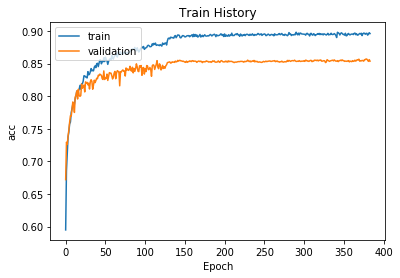

In [13]:
show_train_history_two(train_history, train_history2, 'acc', 'val_acc')  

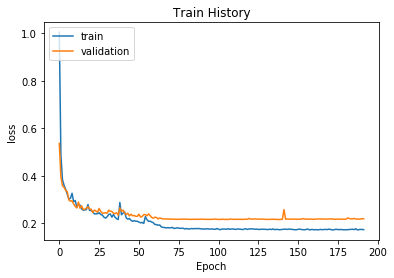

In [39]:
show_train_history_two(train_history, train_history2, 'loss', 'val_loss')  

In [20]:
model.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=512, verbose=2, callbacks=callbacks)

AttributeError: 'function' object has no attribute 'fit'